In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import * 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style ="ticks")


In [4]:
data = pd.read_csv('penguins_size.csv', sep=',')

In [5]:
data.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [6]:
data = data.dropna(axis=0, how='any')
data.shape
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [8]:
#Кодирование категориальных признаков
data["species"].value_counts()
data["species"] = data["species"].astype('category')

data["island"] = data["island"].astype('category')
data["sex"] = data["sex"].astype('category')

#Назначить закодированную переменную новосу столбцу с помощью метода доступа
data["species_cat"] = data["species"].cat.codes
data["island_cat"] = data["island"].cat.codes
data["sex_cat"] = data["sex"].cat.codes
data

data_cat = data.drop(['species', 'island', 'sex'], axis=1, inplace=True)
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_cat,island_cat,sex_cat
0,39.1,18.7,181.0,3750.0,0,2,2
1,39.5,17.4,186.0,3800.0,0,2,1
2,40.3,18.0,195.0,3250.0,0,2,1
4,36.7,19.3,193.0,3450.0,0,2,1
5,39.3,20.6,190.0,3650.0,0,2,2
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,2,0,1
340,46.8,14.3,215.0,4850.0,2,0,1
341,50.4,15.7,222.0,5750.0,2,0,2
342,45.2,14.8,212.0,5200.0,2,0,1


In [9]:
#Загрузка датасета

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from heamy.estimator import Regressor
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset
from sklearn.neural_network import MLPRegressor
from gmdhpy import gmdh
from warnings import simplefilter

simplefilter('ignore')

In [10]:
print('Признаки, имеющие максимальную по модулю корреляцию с body_mass_g')
best_params = data.corr()['body_mass_g'].map(abs).sort_values(ascending=False)[1:]
best_params = best_params[best_params.values > 0.35]
best_params

Признаки, имеющие максимальную по модулю корреляцию с body_mass_g


flipper_length_mm    0.873211
species_cat          0.751020
culmen_length_mm     0.589066
island_cat           0.560518
culmen_depth_mm      0.472987
sex_cat              0.411531
Name: body_mass_g, dtype: float64

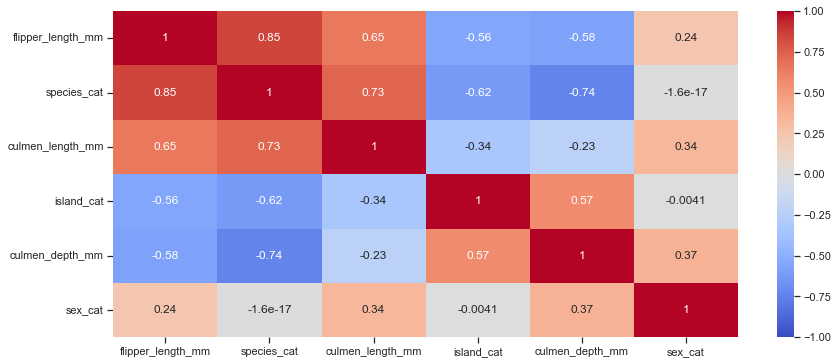

In [11]:
plt.figure(figsize=(14, 6))
sns.heatmap(data[best_params.index].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

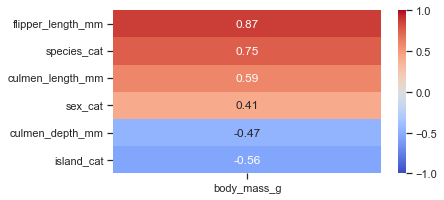

In [12]:
plt.figure(figsize=(6, 3))
sns.heatmap(pd.DataFrame(data[np.append(best_params.index.values, 'body_mass_g')].corr()['body_mass_g'].sort_values(ascending=False)[1:]), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()


In [13]:
#разделение выборки
from sklearn.model_selection import train_test_split
y = data['body_mass_g']
X = data.drop('body_mass_g', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
x_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,species_cat,island_cat,sex_cat
228,43.3,13.4,209.0,2,0,1
48,36.0,17.9,190.0,0,1,1
5,39.3,20.6,190.0,0,2,2
45,39.6,18.8,190.0,0,1,2
174,43.2,16.6,187.0,1,1,1
...,...,...,...,...,...,...
284,45.8,14.2,219.0,2,0,1
263,49.6,15.0,216.0,2,0,2
137,40.2,20.1,200.0,0,1,2
256,42.6,13.7,213.0,2,0,1


In [14]:
y_train

228    4400.0
48     3450.0
5      3650.0
45     4600.0
174    2900.0
        ...  
284    4700.0
263    4750.0
137    3975.0
256    4950.0
158    3250.0
Name: body_mass_g, Length: 233, dtype: float64

In [15]:
#Масштабирование данных
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_train.columns)
x_train.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,species_cat,island_cat,sex_cat
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,0.409151,0.494781,0.497262,0.463519,0.324034,0.736052
std,0.203907,0.238422,0.242362,0.444991,0.352243,0.254419
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245283,0.320988,0.310345,0.000000,0.000000,0.500000
50%,0.426415,0.518519,0.431034,0.500000,0.500000,0.500000
75%,0.581132,0.679012,0.724138,1.000000,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
#Метрики
def print_metrics(y_test, y_pred):
    print(f"R^2: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

In [17]:
#Модель №1: Случайный лес
print_metrics(y_test, RandomForestRegressor(random_state=17).fit(x_train, y_train).predict(x_test))

R^2: 0.8585748677944316
MSE: 92003.40160891089
MAE: 244.8242574257426


In [18]:
#Подбор гиперпараметров
rf = RandomForestRegressor(random_state=17)
params = {'n_estimators': [100, 1000], 'criterion': ['squared_error', 'absolute_error', 'poisson'], 
          'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 3, 5]}
grid_cv = GridSearchCV(estimator=rf, cv=5, param_grid=params, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_cv.fit(x_train, y_train)
print(grid_cv.best_params_)

/Users/alina_vorontsova/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alina_vorontsova/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alina_vorontsova/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/alina_vorontsova/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/alina_vorontsova/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/alina_vorontsova/opt

{'criterion': 'poisson', 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 1000}


In [19]:
best_rf = grid_cv.best_estimator_
best_rf.fit(x_train, y_train)
y_pred_rf = best_rf.predict(x_test)
print_metrics(y_test, y_pred_rf)

R^2: 0.8498984748235618
MSE: 97647.78499796336
MAE: 243.3208201202506


In [20]:

#Модель №2: Градиентный бустинг

print_metrics(y_test, GradientBoostingRegressor(random_state=17).fit(x_train, y_train).predict(x_test))

R^2: 0.8560004614890622
MSE: 93678.16855820481
MAE: 252.10924337629007


In [21]:
gb = GradientBoostingRegressor(random_state=17)
params = {'loss': ['squared_error', 'absolute_error', 'huber'], 'n_estimators': [10, 50, 100, 200], 
          'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'], 'min_samples_leaf': [1, 3, 5]}
grid_cv = GridSearchCV(estimator=gb, cv=5, param_grid=params, n_jobs=-1, scoring='r2')
grid_cv.fit(x_train, y_train)
print(grid_cv.best_params_)

/Users/alina_vorontsova/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/alina_vorontsova/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alina_vorontsova/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/Users/alina_vorontsova/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/alina_vorontsova/opt/anaconda3/lib/python3.9/site-packages/sklearn

{'criterion': 'mae', 'loss': 'huber', 'min_samples_leaf': 5, 'n_estimators': 50}


In [22]:
best_gb = grid_cv.best_estimator_
best_gb.fit(x_train, y_train)
y_pred_gb = best_gb.predict(x_test)
print_metrics(y_test, y_pred_gb)

R^2: 0.8706910637536225
MSE: 84121.27185289699
MAE: 227.22187272647665


In [55]:
#Модель №3: Стекинг
from heamy.estimator import Regressor, Classifier
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset
dataset = Dataset(x_train, y_train, x_test)

In [56]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from heamy.estimator import Regressor
from heamy.pipeline import ModelsPipeline


from warnings import simplefilter

simplefilter('ignore')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor,
                     parameters={'criterion': 'absolute_error', 'n_estimators': 1000, 'random_state': 17}, name='rf')
model_gb = Regressor(dataset=dataset, estimator=GradientBoostingRegressor,
                     parameters={'loss': 'huber', 'random_state': 17}, name='rf')

In [ ]:

pipeline = ModelsPipeline(model_lr, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)
stacker = Regressor(dataset=stack_ds, estimator=GradientBoostingRegressor)
results = stacker.validate(k=10, scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [191.39424868214826, 223.5971668487191, 216.86376824238184, 272.97770520828004, 275.15017993431206, 225.94857678271197, 236.4669684146994, 268.2067712261299, 198.22714693578052, 262.2396119721167]
Mean accuracy: 237.10721442472794
Standard Deviation: 29.413190351082335
Variance: 865.1357666290029

In [ ]:
y_pred_stack = stacker.predict()
print_metrics(y_test, y_pred_stack)

R^2: 0.7207185369761542
MSE: 120930.14007496767
MAE: 247.18161038788267

In [46]:
#Модель №4: Многослойный персептрон
print_metrics(y_test, MLPRegressor(random_state=17).fit(x_train, y_train).predict(x_test))

R^2: -26.36325982292853
MSE: 17801029.728991445
MAE: 4143.502524498616


In [47]:
mlp = MLPRegressor(random_state=17)
params = {'solver': ['lbfgs', 'sgd', 'adam'], 'hidden_layer_sizes': [(100,), (50, 30,), (100, 40,)],
          'alpha': [1e-4, 3e-4, 5e-4], 'max_iter': [500, 1000]}
grid_cv = GridSearchCV(estimator=mlp, cv=5, param_grid=params, n_jobs=-1, scoring='r2')
grid_cv.fit(x_train, y_train)
print(grid_cv.best_params_)


/Users/alina_vorontsova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/alina_vorontsova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/alina_vorontsova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: Convergenc

{'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'max_iter': 500, 'solver': 'lbfgs'}


In [48]:
best_mlp = grid_cv.best_estimator_
best_mlp.fit(x_train, y_train)
y_pred_mlp = best_mlp.predict(x_test)
print_metrics(y_test, y_pred_mlp)

R^2: 0.8674220652679304
MSE: 86247.90221800696
MAE: 230.966913503115


In [54]:
print("Случайный лес")
print_metrics(y_test, y_pred_rf)

print("\nГрадиентный бустинг")
print_metrics(y_test, y_pred_gb)

print("\nМногослойный персептрон")
print_metrics(y_test, y_pred_mlp)



Случайный лес
R^2: 0.8498984748235618
MSE: 97647.78499796336
MAE: 243.3208201202506

Градиентный бустинг
R^2: 0.8706910637536225
MSE: 84121.27185289699
MAE: 227.22187272647665

Многослойный персептрон
R^2: 0.8674220652679304
MSE: 86247.90221800696
MAE: 230.966913503115
